## Example 2 - Mediators

Here, we examine the effect of ENSO on winter precipitation (Dec-Jan-Feb) in California (CA), which we assume is fully mediated by the position of the North Pacific jet stream (Jet). 
(If the figure below does not show, please refer to ../images/ex2.png)

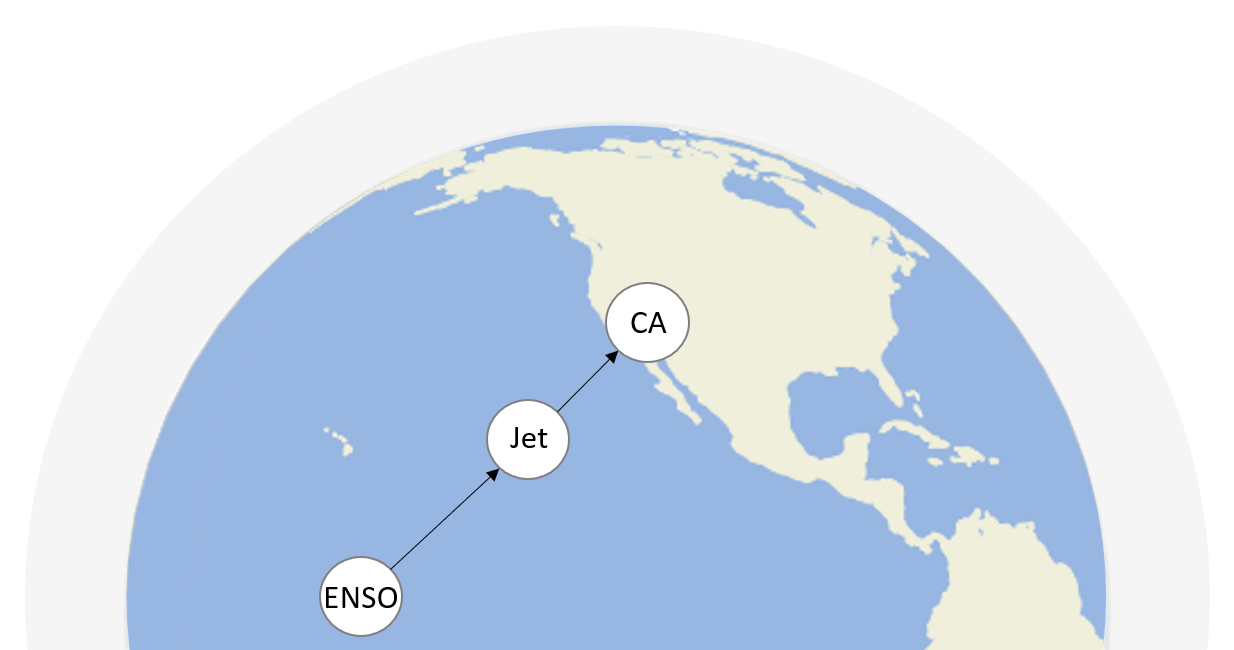


In [ ]:
# IF YOU ARE RUNNING THIS CODE LOCALLY ON YOUR MACHINE WITH JUPYTER NOTEBOOK 
#
#<img src="../images/ex2.png" width="500" height="600">

### References / Notes

1. The link between ENSO and California precipitation is for example described in https://iopscience.iop.org/article/10.1088/1748-9326/11/5/054021/ampdf
2. The California region is described in https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015GL064424
3. The variable Jet is defined as 24-hour differences of Mean Sea Level Pressure, following also https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015GL064424


### Imports

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import statsmodels.api as sm
from scipy import signal

import pandas as pd

In [ ]:
### IF YOU ARE RUNNING THIS WITH GOOGLE COLAB
# 1. download the files in sample_data_csv/ to your Desktop
# 2. run this line of code: it will ask you to upload the data
# 3. select the files needed for this code:
# enso_djf.csv
# jet_djf.csv
# cali_precip_djf.csv
from google.colab import files
uploaded = files.upload()

Saving cali_precip_djf.csv to cali_precip_djf (1).csv
Saving enso_djf.csv to enso_djf (1).csv
Saving jet_djf.csv to jet_djf (1).csv


### Step 1) Load the data + plot time series

In [ ]:
# IF YOU ARE RUNNING THIS CODE WITH GOOGLE COLAB
enso_ts = pd.read_csv('enso_djf.csv')
jet_ts = pd.read_csv('jet_djf.csv')
cali_ts = pd.read_csv('cali_precip_djf.csv')


In [ ]:
enso_ts

,year,jet
0,1950,142434.84
1,1951,111689.36
2,1952,164707.14
3,1953,132193.75
4,1954,136082.67
...,...,...
65,2015,146067.97
66,2016,138850.14
67,2017,231022.47
68,2018,98609.03


In [ ]:
## IF YOU ARE RUNNING THIS CODE LOCALLY ON YOUR MACHINE WITH JUPYTER NOTEBOOK 
#enso_ts = pd.read_csv('your_path_to_sample_data_csv/enso_djf.csv')
#jet_ts = pd.read_csv('your_path_to_sample_data_csv/'jet_djf.csv')
#cali_ts = pd.read_csv('your_path_to_sample_data_csv/cali_precip_djf.csv')

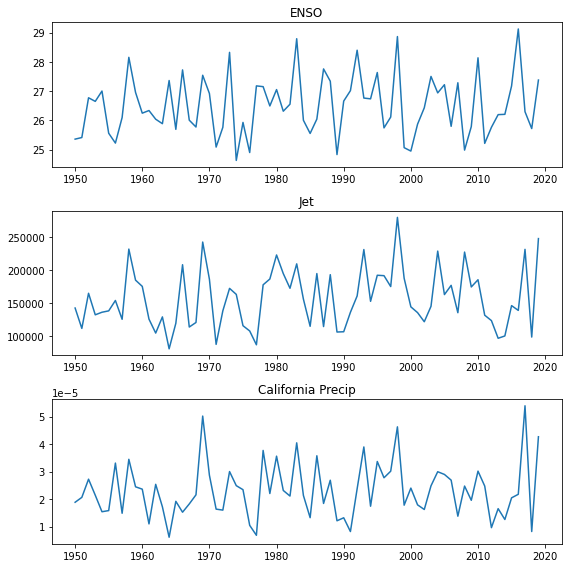

In [ ]:
fig = plt.figure(figsize=(8, 8))

plt.subplot(311)
plt.plot(enso_ts['year'],enso_ts['enso'])
plt.title('ENSO')

plt.subplot(312)
plt.plot(jet_ts['year'],jet_ts['jet'])
plt.title('Jet')

plt.subplot(313)
plt.plot(cali_ts['year'],cali_ts['cali'])
plt.title('California Precip')
plt.tight_layout()

### Step 2)   Data Processing

In [ ]:
years = enso_ts['year'] 
enso_data = enso_ts['enso'] 
jet_data = jet_ts['jet']
cali_data  = cali_ts['cali']

#### Standardize the data (zero mean, unit variance)

In [ ]:
ENSO = (enso_data - np.mean(enso_data))/np.std(enso_data)
JET = (jet_data - np.mean(jet_data))/np.std(jet_data)
CA = (cali_data - np.mean(cali_data))/np.std(cali_data)

#### Detrend the data (remove linear trend)

In [ ]:
ENSO = signal.detrend(ENSO)
JET = signal.detrend(JET)
CA = signal.detrend(CA)

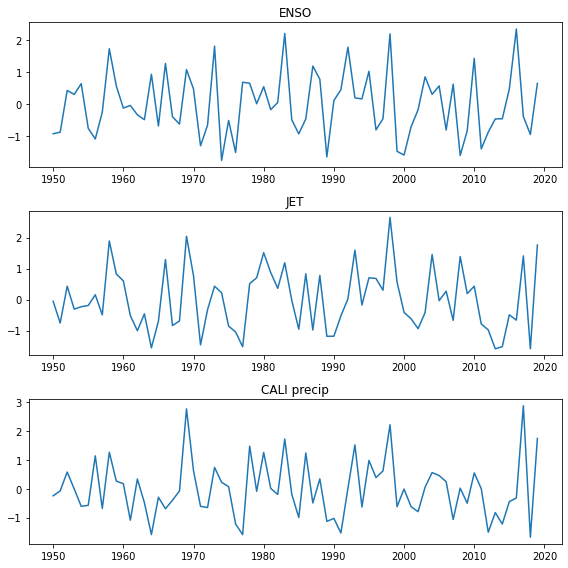

In [ ]:
fig = plt.figure(figsize=(8, 8))


plt.subplot(311)
plt.plot(years,ENSO)
plt.title('ENSO')

plt.subplot(312)
plt.plot(years,JET)
plt.title('JET')

plt.subplot(313)
plt.plot(years,CA)
plt.title('CALI precip')

plt.tight_layout()

### Step 3)   Data Analysis

In [ ]:
#================================================================
# Determine the effect of ENSO on CA, after controlling for Jet
#================================================================

X = np.stack([ENSO, JET]).T
Y = CA

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca_cond_jet = results.params[0]
ce_jet_ca = results.params[1]

print("The regression coeff of ENSO on CA conditioned on Jet is ", round(ce_enso_ca_cond_jet,2))
print("The regression coeff. of Jet on CA is ", round(ce_jet_ca,2))

The regression coeff of ENSO on CA conditioned on Jet is  0.05
The regression coeff. of Jet on CA is  0.79


### Conclusions

Once we 'block' the pathway via Jet, i.e. by including it in the regression, the effect of ENSO to CA is reduced to almost zero. This is because its causal effect is mediated via Jet. 


## EXCERCISE (solutions at the end of the notebook)

In [ ]:
#================================================================
# A. Determine the causal effect of ENSO on CA 
#================================================================


In [ ]:
#================================================================
# B. Determine the causal effect of ENSO on Jet
#================================================================


In [ ]:
#================================================================
# C. Determine the causal effect of Jet on CA
#================================================================


In [ ]:
#===================================================================
# D. Path tracing rule: What is the indirect effect 
# of ENSO on CA via the path ENSO -> Jet -> CA? 
# How does this compare with the correlation between ENSO and CA?
#===================================================================



## SOLUTIONS 

In [ ]:
#================================================================
# A. Determine the total causal effect of ENSO on CA 
#================================================================
X =  ENSO
Y = CA

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_ca = results.params[0]

print("The total causal effect of ENSO on CA is ", round(ce_enso_ca,2))

The total causal effect of ENSO on CA is  0.34


In [ ]:
#================================================================
# B. Determine the causal effect of ENSO on Jet
#================================================================
X =  ENSO
Y = JET

model = sm.OLS(Y,X)
results = model.fit()

ce_enso_jet = results.params[0]

print("The causal effect of ENSO on Jet is ", round(ce_enso_jet,2))

The causal effect of ENSO on Jet is  0.37


In [ ]:
#================================================================
# C. Determine the causal effect of Jet on CA
#================================================================
X =  JET
Y = CA

model = sm.OLS(Y,X)
results = model.fit()

ce_jet_ca = results.params[0]

print("The causal effect of Jet on CA is ", round(ce_jet_ca,2))

The causal effect of Jet on CA is  0.81


In [ ]:
#===================================================================
# D. Path tracing rule: What is the indirect effect 
# of ENSO on CA via the path ENSO -> Jet --> CA? 
# How does this compare with the total causal effect of ENSO on CA
# computed in excercise A?
#===================================================================

ce_along_path = ce_enso_jet * ce_jet_ca 


print("The indirectly estimated effect of ENSO on CA along the path ENSO -> Jet --> CA is ", round(ce_along_path ,2))
print("The directly estimated effect of ENSO on CA is ", round(ce_enso_ca, 2))

The indirectly estimated effect of ENSO on CA along the path ENSO -> Jet --> CA is  0.3
The directly estimated effect of ENSO on CA is  0.34
